In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Activation,BatchNormalization

In [5]:
os.listdir(r"C:\Users\anmol\impli\xray_datasetNew_covid19\train")

['NORMAL', 'PNEUMONIA']

In [6]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: D:\Users\anmol\Research Work\CNN XRAY\Github Repo\VGG16


In [16]:
train_dir= r"C:\Users\anmol\impli\xray_datasetNew_covid19\train"
test_dir= r"C:\Users\anmol\impli\xray_datasetNew_covid19\test"
val_dir= r"C:\Users\anmol\impli\xray_datasetNew_covid19\val"

num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

In [17]:
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [18]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [19]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))


test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [20]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

In [21]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [22]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [25]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data= validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          
                    validation_steps=25,
)
# #         steps_per_epoch=100,
#           steps_per_epoch = len(train)//batch_size,
#           validation_steps=len(test)//batch_size

Epoch 1/10
100/100 [==============================] - 214s 2s/step - loss: 0.2512 - accuracy: 0.6475 - precision: 0.9031 - recall: 0.5920 - val_loss: 0.6039 - val_accuracy: 0.6250 - val_precision: 0.6667 - val_recall: 0.5000
Epoch 2/10
100/100 [==============================] - 226s 2s/step - loss: 0.1972 - accuracy: 0.7462 - precision: 0.9322 - recall: 0.7124
Epoch 3/10
100/100 [==============================] - 225s 2s/step - loss: 0.1827 - accuracy: 0.7475 - precision: 0.9379 - recall: 0.7169
Epoch 4/10
100/100 [==============================] - 219s 2s/step - loss: 0.1937 - accuracy: 0.7638 - precision: 0.9267 - recall: 0.7484
Epoch 5/10
100/100 [==============================] - 216s 2s/step - loss: 0.1787 - accuracy: 0.7862 - precision: 0.9284 - recall: 0.7695
Epoch 6/10
100/100 [==============================] - 214s 2s/step - loss: 0.1762 - accuracy: 0.7837 - precision: 0.9265 - recall: 0.7682
Epoch 7/10
100/100 [==============================] - 228s 2s/step - loss: 0.1828 - a

In [26]:
accuracy = r.history['accuracy']
val_accuracy  = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

Text(0.5, 1.0, 'Accuracy Evolution')

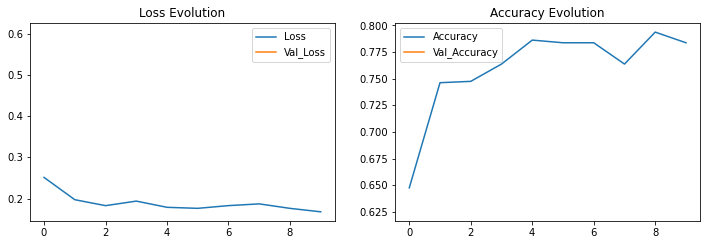

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [30]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 108s 173ms/step - loss: 1.0401 - accuracy: 0.5369 - precision: 0.9720 - recall: 0.2667
Test Accuracy: 53.69%
652/652 [==============================] - 522s 799ms/step - loss: 1.2065 - accuracy: 0.4630 - precision: 0.9981 - recall: 0.2777
Train Accuracy: 46.30%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))